# 04. Pytorch custom dataset notebook

We've used some dataset with pytorch before.

but how do you get your own data into pytorch.

one of the ways to do so via: custom dataset.

## Domain libraries

Depending on what youre working on, vision, text, audio, recomendation, you'll want to look  into each of pytorch domain libraries for existing data loading function and customizable data loading functions.

**Resources**
* Book version of cource material :
https://www.learnpytorch.io/04_pytorch_custom_datasets/ 
* Ground truth version :
https://github.com/mrdbourke/pytorch-deep-learning/blob/main/04_pytorch_custom_datasets.ipynb 

In [1]:
import torch
from torch import nn

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!nvidia-smi

Sun Mar  5 21:36:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    30W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1 Get Data

Our dataset is subset of Food101 dataset.

Food101 and 101 different classes of food and 1000 images per class(750 training and 250 testing)

Our dataset Starts with 3 classes of food and only 10% of the images (~75 TRAINING,25 Testing).

Why do this?

When starting out ML Projects, Its important to try things on small scale and then increase the scale when necessary.
The whole point is to speed up how fast you can expirement.

In [4]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data Folder
data_path = Path("data")
image_path = data_path/"pizza_steak_sushi"

#if image path exisits or not , download and prepare it
if image_path is dir():
  print(f"{image_path} Directory already exists...... skip downloading")

else:
  print(f"{image_path } does not exist, creating one..... ")
  image_path.mkdir(parents=True, exist_ok=True)

# download
with open(data_path / "pizza_steak_sushi.zip","wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading Pizza, Steak, sushi data.....")
  f.write(request.content)

#Unzip pizza steak sushi data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
  print("Unzipping pizza sushi data....")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one..... 
Unzipping pizza sushi data....


## 2 Becoming one with data(data Preparation and Data exploration)

In [5]:


import os
def walk_through_dir(dir_path):
  """Walks through dir path returing its content"""
  for dirpath , dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}',")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi',
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test',
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi',
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza',
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak',
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train',
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi',
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza',
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak',


In [7]:
#Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir , test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visulizing and image

Lets write some code to:
1. get all of the image path
2. pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we are working with images, lets open the image with Python's PIL.
5. We'll then show the image and print the meta data.

Random image path: data/pizza_steak_sushi/train/pizza/1033251.jpg
Image class: pizza
Image height: 512
Image width: 512


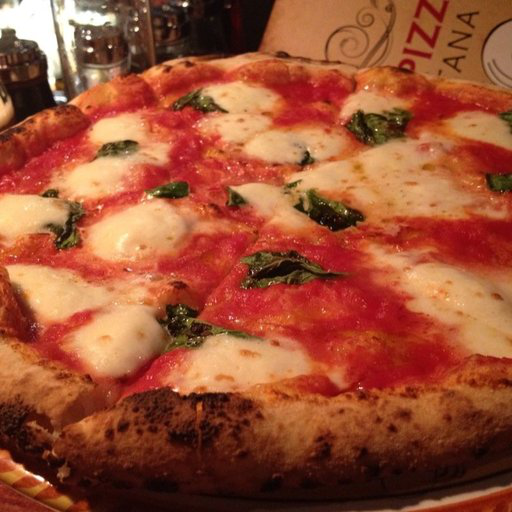

In [8]:
import random
from PIL import Image

#random.seed(42)

#1.get all the image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image path using Python's random.choice()
random_image_path = random.choice(image_path_list)
#print(random_image_path)

#3. Get the image class name from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
#print(image_class)

#4.Since we are working with images, lets open the image with Python's PIL.
img = Image.open(random_image_path)

#5.We'll then show the image and print the meta data.
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

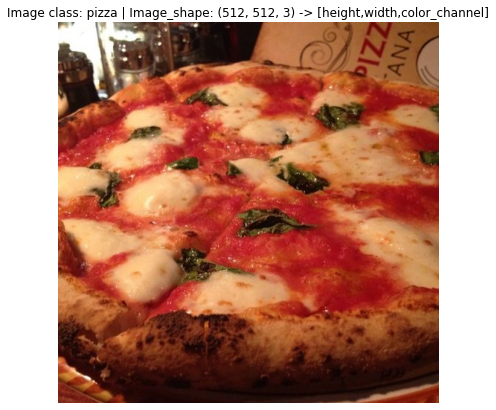

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#Turn the image into an array
img_as_array = np.asarray(img)
plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image_shape: {img_as_array.shape} -> [height,width,color_channel]")
plt.axis(False)

In [10]:
img_as_array

array([[[102, 100,  88],
        [102, 100,  87],
        [105, 102,  85],
        ...,
        [120,  68,  21],
        [119,  67,  20],
        [120,  68,  21]],

       [[ 99,  95,  83],
        [104,  98,  84],
        [110, 103,  85],
        ...,
        [121,  69,  22],
        [120,  68,  21],
        [124,  72,  25]],

       [[ 97,  88,  71],
        [105,  97,  78],
        [114, 103,  83],
        ...,
        [120,  68,  21],
        [119,  67,  20],
        [126,  74,  27]],

       ...,

       [[131,  49,  28],
        [124,  42,  21],
        [119,  37,  16],
        ...,
        [152,  67,  38],
        [150,  65,  34],
        [139,  54,  23]],

       [[132,  49,  31],
        [126,  43,  25],
        [124,  41,  23],
        ...,
        [152,  69,  39],
        [144,  61,  29],
        [127,  44,  12]],

       [[121,  38,  22],
        [120,  37,  21],
        [122,  39,  23],
        ...,
        [150,  67,  37],
        [136,  53,  21],
        [114,  31,   0]]

## 3 Transforming Data
Before we can use our image data with Pytorch
1. Turn your target data into tensors(in our case numerical representation of our images).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a`torch.utils.data.DataLoader`, We'll cal these `Dataset`and `DataLoader`.



In [11]:
import torch 
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with torchvision.transforms

In [12]:
# Write a transform for image
data_transform = transforms.Compose([
    #Resize our images to 64X64
    transforms.Resize(size=(64,64)),
    #Flip the images randomly on the Horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    #Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [13]:
x=data_transform(img)

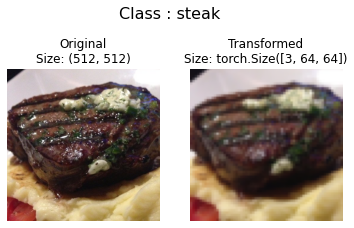

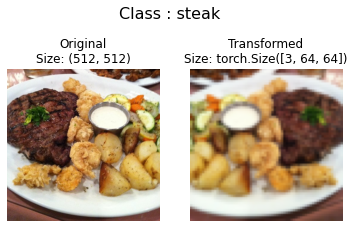

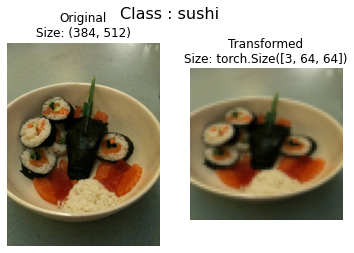

In [14]:
def plot_transformed_images(image_paths,transform , n=3, seed =42):
  """ Selects radndom image from a path of images and loads/transforms them 
  then plots the original vs the transformed version. """

  #if seed:
    #random.seed(seed)
  random_image_paths = random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1 , ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and Plot Target Image
      Transformed_image = transform(f)# note we will need to change the shape for matplotlib
      ax[1].imshow(Transformed_image.permute(1,2,0))
      ax[1].set_title(f"Transformed\nSize: {Transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class : {image_path.parent.stem}",fontsize =16)

plot_transformed_images(image_path_list,data_transform,n=3)

## 4 Option 1: Loading image data using `ImageFolder`

We can load image classifciation data usinh `torchvision.datasets.ImageFolder`
https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html

In [15]:
from torchvision import datasets
train_data = datasets.ImageFolder(root =train_dir,
                                  transform =data_transform)
test_data = datasets.ImageFolder(root =test_dir,
                                  transform =data_transform)

train_data ,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [16]:
# Get class name as list
class_name = train_data.classes
class_name 

['pizza', 'steak', 'sushi']

In [17]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [18]:
#check the length of our dataset
len(train_data),len(test_data)

(225, 75)

In [19]:
#Index on the traindata dataset to get a single image and label
i,l = train_data[4]
print(f"image Tensor: \n{i}")
print(f"Image Shape:{i.shape}")
print(f"Image Label:{l}")
print(f"Image Datatype:{type(l)}")

image Tensor: 
tensor([[[0.9216, 0.8745, 0.7059,  ..., 0.2431, 0.5020, 0.5059],
         [0.8902, 0.7490, 0.6941,  ..., 0.2353, 0.5020, 0.5451],
         [0.8314, 0.8000, 0.8078,  ..., 0.4000, 0.5529, 0.5647],
         ...,
         [0.9686, 0.9725, 0.9608,  ..., 0.8118, 0.8510, 0.8431],
         [0.9608, 0.9608, 0.9608,  ..., 0.7412, 0.7333, 0.6196],
         [0.9608, 0.9608, 0.9608,  ..., 0.7725, 0.7176, 0.5216]],

        [[0.8549, 0.7765, 0.5412,  ..., 0.1216, 0.2667, 0.2549],
         [0.7882, 0.5882, 0.4824,  ..., 0.1098, 0.2706, 0.2902],
         [0.6824, 0.6275, 0.6471,  ..., 0.2157, 0.3137, 0.3176],
         ...,
         [0.8157, 0.8196, 0.8078,  ..., 0.6235, 0.6627, 0.6431],
         [0.8118, 0.8157, 0.8118,  ..., 0.5294, 0.5412, 0.4627],
         [0.8157, 0.8078, 0.8078,  ..., 0.5569, 0.4941, 0.3843]],

        [[0.7176, 0.6118, 0.3569,  ..., 0.0627, 0.1059, 0.1059],
         [0.6431, 0.4000, 0.2706,  ..., 0.0588, 0.1059, 0.1098],
         [0.5216, 0.4510, 0.4667,  ..., 0.0

original shape : torch.Size([3, 64, 64])
permutated shape : torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

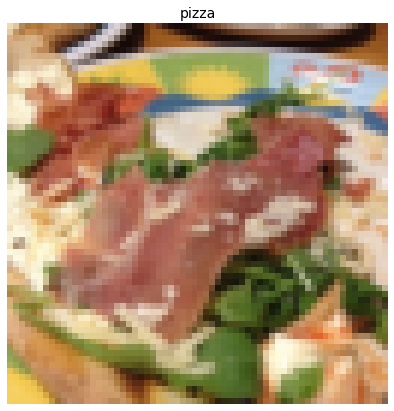

In [20]:
# Rearrange the order of dimensions 
img_permute = i.permute(1,2,0)

print(f"original shape : {i.shape}")
print(f"permutated shape : {img_permute.shape}")

plt.figure(figsize =(10,7))
plt.imshow(img_permute)
plt.axis("off");
plt.title(class_name[l],fontsize =14)


### 4.1 Turn Loaded images into `DataLoader`'s
A `DataLoader`is going to help us turn our dataset's into iterables and we can customize the `batch_size` so our model can see `batch_size` images at a time.

In [21]:
import os
os.cpu_count()

2

In [22]:
#turn train and test datastes into dataloader
from torch.utils.data import DataLoader

BATCH_SIZE = 1
train_dataloader = DataLoader(dataset = train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle = False)

len(train_dataloader),len(test_dataloader) 

(225, 75)

In [23]:
len(train_data),len(test_data)

(225, 75)

In [24]:
i,l = next(iter(train_dataloader))
#print(f"image Tensor: \n{i}")
print(f"Image Shape:{i.shape}")
#print(f"Image Label:{l}")
print(f"Image Shape:{l.shape}")


Image Shape:torch.Size([1, 3, 64, 64])
Image Shape:torch.Size([1])


## 5 option to loading data with the custom `dataset`.

1. want to be able to load images from file.
2. want to be able to get class names from the dataset
3. want to be able to get classes as dicitionary from the dataset

Pros:
* you can create a dataset out of anything 
* Not limited to pytorch prebuilt dataset functions

Cons:
* Even though you could create dataset out of almost anything, It doesn't mean it will work ......
* Using a custom `Dataset` Often results in us writing more code, Which could be prone to errors or performance issues

All Custom datasets in pytorch, often subclass- https://pytorch.org/docs/stable/data.html#module-torch.utils.data.Dataset

In [26]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List 

In [27]:
# Instance Of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a Helper function to  get class names 

We want a function to:
1. get the class names usinh `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format).
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure).
3. Turn the class names into a dict and a list and return them.


In [28]:
# setuo  path for target directory
target_directory = train_dir
print(f"Target dir:{target_directory}")

# get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir:data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [33]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str,int]]:
  """ Find the class folder names in a target Directory"""
  #1. Get the class nams by Scanning the Target Directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  
  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}..... please check file structure.")

  #3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i,class_name in enumerate(classes)}  

  return classes, class_to_idx

In [34]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`